In [4]:
import pandas as pd
import numpy as np
import csv
import os
import time
import datetime
import copy
import operator
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.stattools as ts
from pandas.plotting import scatter_matrix, autocorrelation_plot

In [5]:
userDirPath = "/Users/dohk/GoogleDrive/do-hyung/coin/coinData/"
coinList = ['BTC', 'ETH', 'XRP', 'BCH', 'LTC', 'EOS', 'DASH', 'XMR', 'ETC', 'QTUM', 'BTG', 'ZEC']
priceList = ['opening price', 'closing price', 'high price', 'low price']
columnNames = ['unix timestamp', 'human readable time', 'opening price','closing price', 'high price', 'low price', 'volume', 'type']

In [6]:
coins = {}
for coin in coinList:
#     coins[coin] = pd.read_csv(userDirPath+'coin_'+coin+'_cleanup.csv',names=columnNames)[priceList]
    coins[coin] = pd.read_csv(userDirPath+'coin_'+coin+'_cleanup.csv',names=columnNames)\
                                                        [[columnNames[0]]+priceList+[columnNames[6]]]
    # DataFrame변수 자체에 어떤 column을 쓸지 리스트의 리스트로 기술

In [13]:
# for coin in coinList:
#     print("{:5s} - {:d}".format(coin, len(coins[coin])))
closingPrice = {}
closingPriceList = []
for coin in coinList:
    lengthOfCoin = len(coins[coin]['unix timestamp'].tolist()) # 현재 코인의 길이 저장
    currentCoinUnixTimestamp = coins[coin]['unix timestamp'].tolist() # 현재 coin의 unix timestamp만 저장
    for i in range(lengthOfCoin):
        if unixTime_start['EOS'] == currentCoinUnixTimestamp[i]:
#             closingPrice[coin] = coins[coin]['closing price'].to_frame()
            closingPrice[coin] = \
                coins[coin]['closing price'].tolist()[i:]
                                                    #[i:min(unixTime_end['EOS'], currentCoinUnixTimestamp[i])]
            closingPriceList.append(closingPrice[coin])
#         elif unixTime_end['EOS'] <= currentCoinUnixTimestamp[i]:
#             print("...4")
#             break
        else:
            continue
# print("...5")
# for coin in coinList:
#     closingPriceDataFrame = pd.concat(closingPriceList, axis=1, keys=coinList)
print(closingPrice.keys())

# pandas.DataFrame.from_dict를 사용하기 위해서는 ValueError: arrays must all be same length 문제 해결 필요
EOSLength = len(closingPrice['EOS'])
for coin in coinList:
    if EOSLength < len(closingPrice[coin]):
        closingPrice['EOS'].append(closingPrice['EOS'][-1])
#         continue
    elif EOSLength > len(closingPrice[coin]):
        closingPrice[coin].append(closingPrice[coin][-1])
#         closingPrice[coin][:EOSLength]
#     print(len(closingPrice[coin]))

# type 확인
print(type(closingPrice))
print(type(coins[coinList[0]][[priceList[0], priceList[1], priceList[2], priceList[3]]]))
print(type(pd.DataFrame.from_dict(closingPrice)))
closingPriceDict = pd.DataFrame.from_dict(closingPrice)
closingPriceDict

dict_keys(['BTC', 'ETH', 'XRP', 'BCH', 'LTC', 'EOS', 'DASH', 'XMR', 'ETC', 'QTUM', 'BTG', 'ZEC'])
<class 'dict'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,BCH,BTC,BTG,DASH,EOS,ETC,ETH,LTC,QTUM,XMR,XRP,ZEC
0,1736000,18446000,300400,980500,11998,32980,732000,326650,19880,354300,510,437400
1,1727500,18442000,302500,983800,11998,33020,734900,325600,20020,354700,514,429200
2,1730000,18500000,302200,981200,10500,33010,739000,325500,19980,354000,513,432000
3,1733500,18662000,297200,983900,8349,33170,745200,325900,19550,342000,497,432500
4,1738000,18798000,296700,980000,8390,32960,763500,340000,19580,342100,496,431500
5,1743000,18740000,295600,997200,7991,33030,743000,335350,19400,345500,499,432600
6,1755500,18821000,297100,980400,7515,33150,746000,344350,19350,345800,499,434900
7,1759500,18770000,298100,994000,7731,33220,745700,345450,19210,345500,500,431900
8,1759500,18714000,299400,992000,7576,33420,741300,353000,19000,347400,499,436700
9,1739000,18780000,299500,984300,7575,33240,746100,371500,19110,345300,495,435500


In [14]:
# 12개 코인별 데이터의 개수, 평균값, 표준편차, 최소값, 최대값, 사분위수(IQR)
describe_coins = {}
for coin in coinList:
    describe_coins[coin] = coins[coin].describe()
    for priceType in priceList:
        describe_coins[coin][priceType] = describe_coins[coin][priceType].apply(lambda x: '{:.0f}'.format(x))
        
    
for coin in coinList:
    print("----------", coin, "----------")
    print(describe_coins[coin], end="\n\n")
    
# 코인별 사분위수
# for coin in coinList:
#     print("[ {:6s}'s quantile]".format(coin))
# #     print(coins[coin]['closing price'].quantile([.25, .5, .75])) # 코인별 종가의 사분위수
#     print(coins[coin].quantile([.25, .5, .75]))
#     print("----------",end="\n\n")

# 각 코인별 종가의 IQR; Interquartile Range 50% 범위 구하기
# IQRs = {}
# for coin in coinList:
#     Q1 = coins[coin]['closing price'].quantile([.25]).values.tolist()[0]
#     Q3 = coins[coin]['closing price'].quantile([.75]).values.tolist()[0]
#     IQR = Q3-Q1
#     IQRs[coin] = IQR
#     print("{:4s}'s 50% range is {:7d} won.".format(coin, int(IQRs[coin])), end="\n\n")

---------- BTC ----------
       unix timestamp opening price closing price high price low price  \
count    3.700800e+04         37008         37008      37008     37008   
mean     1.508068e+12       8551676       8551945    8586094   8516703   
std      6.410060e+09       5999474       5999375    6030788   5966610   
min      1.496966e+12       1803000       1803000    1841000   1800000   
25%      1.502517e+12       3955000       3955750    3985000   3930000   
50%      1.508068e+12       6374000       6374000    6392000   6356000   
75%      1.513619e+12      11998250      11997250   12055000  11940000   
max      1.519170e+12      25977000      25961000   25988000  25520000   

             volume  
count  37008.000000  
mean     177.302498  
std      223.305919  
min        0.000000  
25%       62.653979  
50%      110.617899  
75%      201.484698  
max     3275.796542  

---------- ETH ----------
       unix timestamp opening price closing price high price low price  \
count   

2017년 6월 9일부터 2018년 2월 21일까지의 BTC 시장의 종가 데이터를 보면 데이터의 개수가 37008개, 저가가 1,803,000원, 고가가 25,961,000원, 산술평균값은 8,551,945원임을 알 수 있다. 표준편차는 5,999,375원이고, 3사분위수(75%)가 11,997,250원이며, 종가 데이터의 대부분은 2,552,301원에서 14,551,051원 사이에 있음을 알 수 있다.

In [15]:
# 12개 코인별 time column 작업
unixTime_start = {}
unixTime_end = {}
humanReadableTime_start = {}
humanReadableTime_end = {}

for coin in coinList:
    unixTime_start[coin] = pd.read_csv(
        userDirPath+'coin_'+coin+'_cleanup.csv',names=columnNames)[columnNames[0]].iloc[0]
    
    unixTime_end[coin] = pd.read_csv(
        userDirPath+'coin_'+coin+'_cleanup.csv',names=columnNames)[columnNames[0]].iloc[-1]
    
    humanReadableTime_start[coin] = pd.read_csv(
        userDirPath+'coin_'+coin+'_cleanup.csv',names=columnNames)[columnNames[1]].iloc[0]
    # 
    humanReadableTime_end[coin] = pd.read_csv(
        userDirPath+'coin_'+coin+'_cleanup.csv',names=columnNames)[columnNames[1]].iloc[-1]

In [16]:
for coin in coinList:
    print(coin)
    print(humanReadableTime_start[coin], "~", humanReadableTime_end[coin])
    print("----------", end="\n\n")

BTC
2017-06-09 08:50:00 ~ 2018-02-21 08:40:00
----------

ETH
2017-06-09 09:00:00 ~ 2018-02-21 08:40:00
----------

XRP
2017-06-09 09:00:00 ~ 2018-02-21 08:50:00
----------

BCH
2017-08-04 21:40:00 ~ 2018-02-21 08:40:00
----------

LTC
2017-06-09 09:00:00 ~ 2018-02-21 08:50:00
----------

EOS
2017-12-13 20:50:00 ~ 2018-02-21 08:50:00
----------

DASH
2017-06-09 09:00:00 ~ 2018-02-21 08:50:00
----------

XMR
2017-08-28 14:40:00 ~ 2018-02-21 08:50:00
----------

ETC
2017-06-09 09:00:00 ~ 2018-02-21 08:50:00
----------

QTUM
2017-10-20 18:10:00 ~ 2018-02-21 08:50:00
----------

BTG
2017-11-24 14:10:00 ~ 2018-02-21 08:50:00
----------

ZEC
2017-09-28 18:10:00 ~ 2018-02-21 08:50:00
----------



In [17]:
# 코인별 starttime ~ endtime
# for coin in coinList:
#     print(coin+"'s {:10s}{:5s}".format("start: ", start[coin]))
#     print(coin+"'s {:10s}{:5s}".format("end: ", end[coin]))
#     print()

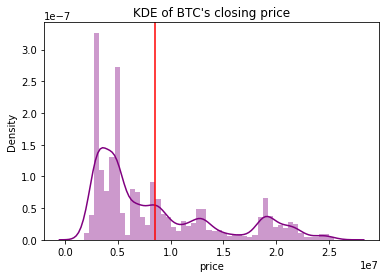

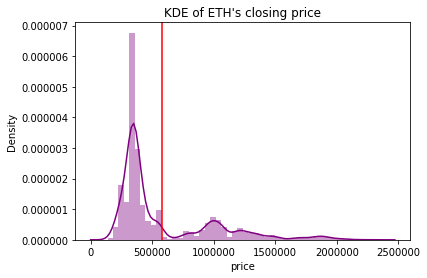

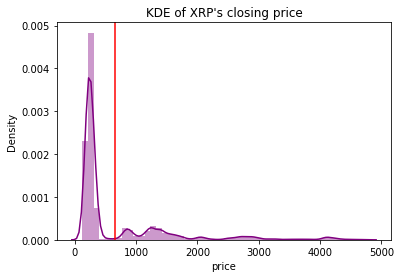

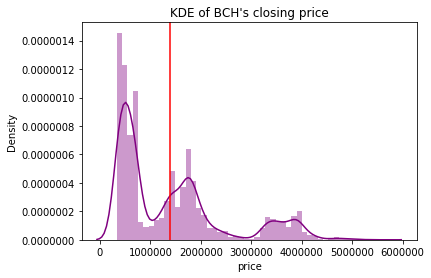

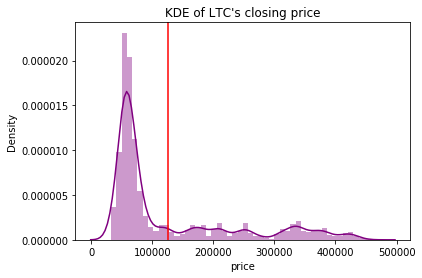

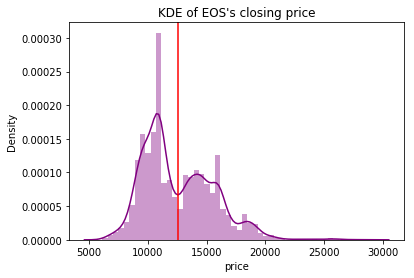

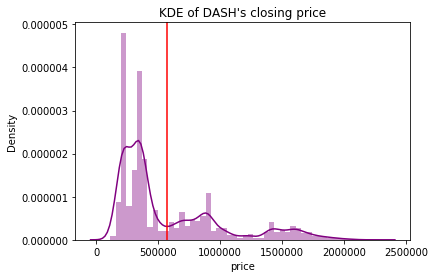

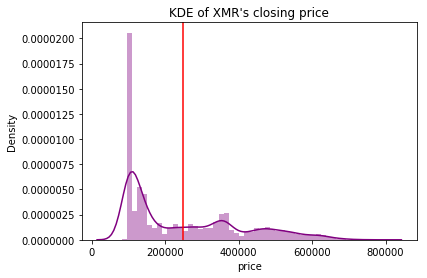

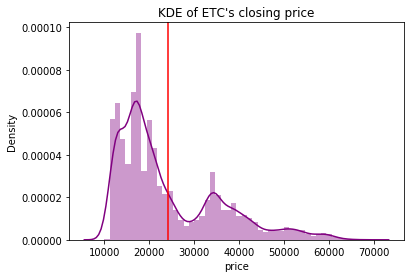

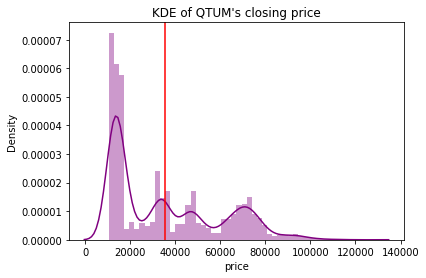

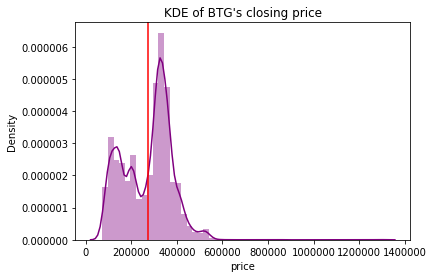

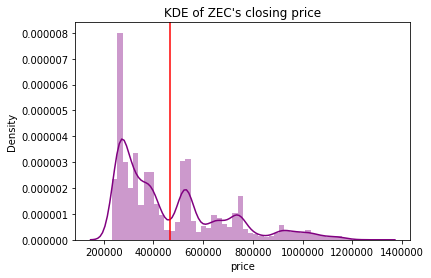

In [18]:
# 각 코인별 전체 기간동안의 종가의 커널 밀도 추정
# 코인별로 전체 기간은 제각각이다.
for i, coin in enumerate(coinList):
    plt.title("KDE of " + coin+"'s closing price")
#     plt.figure(figsize=(10,5))
    sns.distplot(coins[coinList[i]]['closing price'].dropna(), bins=50, color='purple', kde=True)
    plt.axvline(coins[coin]['closing price'].mean() ,color='red') # 평균을 표현하는 vertical line
    # seaborn.distplot
    # This function combines the matplotlib hist function (with automatic calculation of a good default bin size) 
    # with the seaborn kdeplot() and rugplot() functions. 
    # It can also fit scipy.stats distributions and plot the estimated PDF over the data.
    plt.xlabel('price')
    plt.ylabel('Density')
    plt.show()

2017년 12월 13일 수요일 오후 8:50:00 ~ 2018년 2월 21일 수요일 오전 8:50:00


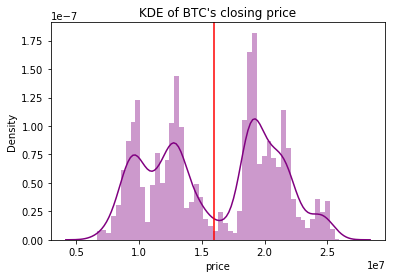

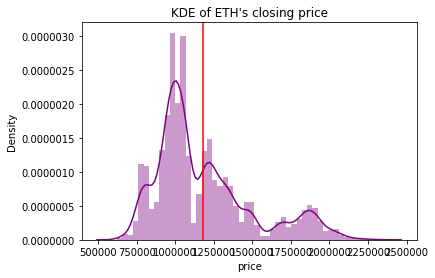

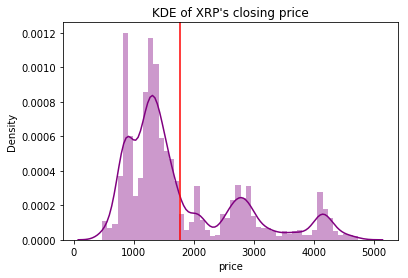

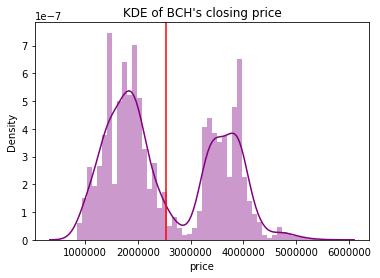

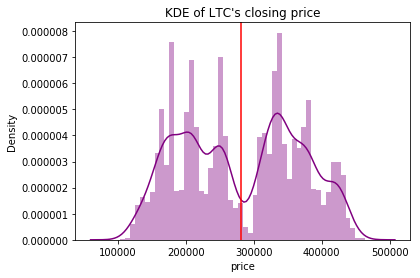

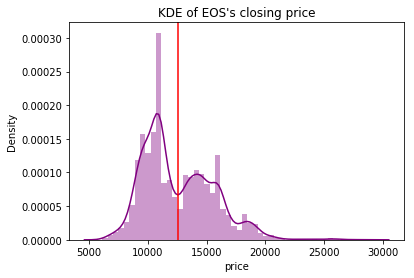

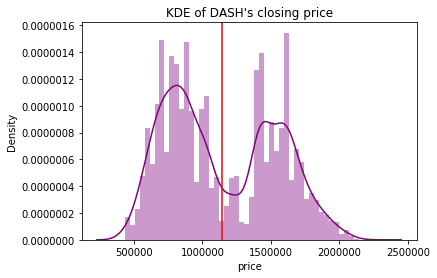

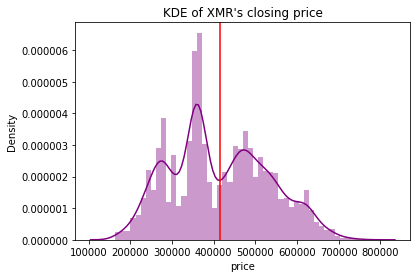

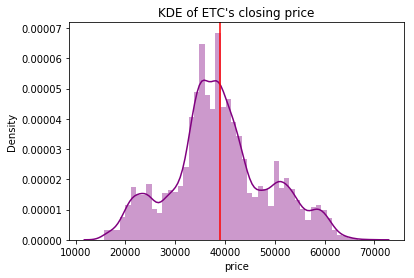

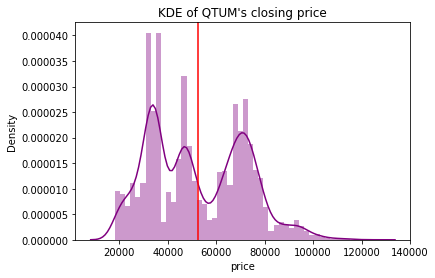

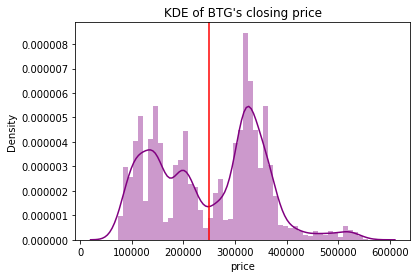

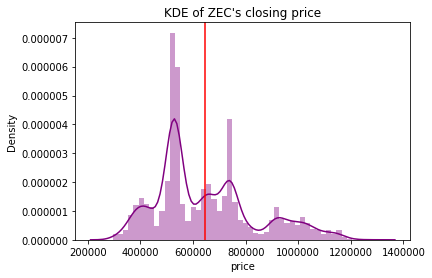

In [19]:
# 공통기간: 2017년 12월 13일 수요일 오후 8:50:00 ~ 2018년 2월 21일 수요일 오전 8:50:00
# 코인별 종가의 커널 밀도 추정
# print(unixTime_start['EOS'], "~", unixTime_end['EOS'])
print("2017년 12월 13일 수요일 오후 8:50:00 ~ 2018년 2월 21일 수요일 오전 8:50:00")
for i, coin in enumerate(coinList):
    plt.title("KDE of " + coin+"'s closing price")
#     plt.figure(figsize=(10,5))
    sns.distplot(closingPriceDict[coinList[i]].dropna(), bins=50, color='purple', kde=True)
    plt.axvline(closingPriceDict[coin].mean() ,color='red') # 평균을 표현하는 vertical line
    # seaborn.distplot
    # This function combines the matplotlib hist function (with automatic calculation of a good default bin size) 
    # with the seaborn kdeplot() and rugplot() functions. 
    # It can also fit scipy.stats distributions and plot the estimated PDF over the data.
    plt.xlabel('price')
    plt.ylabel('Density')
    plt.show()

- 밀도 추정(Density Estimation)이란 데이터가 가질 수 있는 값의 범위인 변수와 실제 발생한 값인 데이터간의 관계를 파악함으로써, 변수가 가질 수 있는 모든 값의 밀도를 추정하는 것이다. 이는 곧 확률이다. 이 때 변수가 가질 수 있는 값의 분포는 꼭 정규 분포를 따르지 않기 때문에 커널 함수를 이용하여 확률 분포를 나타낸다.
- 각 코인별 전체 기간에 대한 커널 밀도 추정의 결과, EOS의 경우를 보면 대략 10000원에 가까운 값이 발생할 가능성이 가장 높다고 할 수 있다.
- 2017년 12월 13일 수요일 오후 8:50:00 ~ 2018년 2월 21일 수요일 오전 8:50:00 기간 동안의 커널 밀도 추정 결과, ETC의 경우 평균값 근처에서 값이 형성될 가능성이 가장 높은 것으로 나왔다.

------BTC   ↓


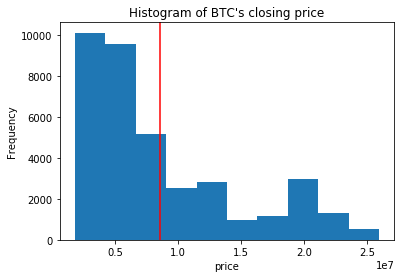

Bin : 1803000,       Frequency = 10099
Bin : 4218800,       Frequency = 9527
Bin : 6634600,       Frequency = 5183
Bin : 9050400,       Frequency = 2511
Bin : 11466200,       Frequency = 2841
Bin : 13882000,       Frequency = 948
Bin : 16297800,       Frequency = 1146
Bin : 18713600,       Frequency = 2958
Bin : 21129400,       Frequency = 1290
Bin : 23545200,       Frequency = 505


------ETH   ↓


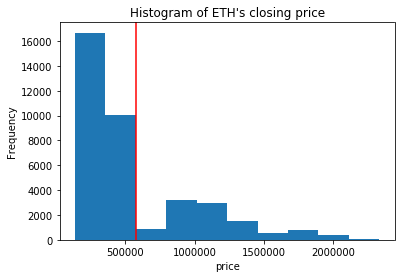

Bin : 135900,       Frequency = 16676
Bin : 355810,       Frequency = 10038
Bin : 575720,       Frequency = 834
Bin : 795630,       Frequency = 3236
Bin : 1015540,       Frequency = 2970
Bin : 1235450,       Frequency = 1497
Bin : 1455360,       Frequency = 554
Bin : 1675270,       Frequency = 771
Bin : 1895180,       Frequency = 400
Bin : 2115090,       Frequency = 31


------XRP   ↓


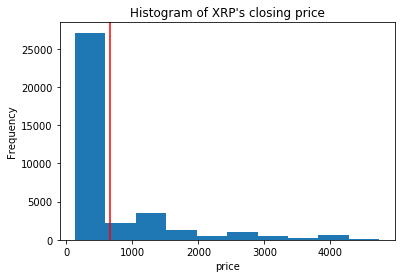

Bin : 128,       Frequency = 27098
Bin : 589,       Frequency = 2164
Bin : 1050,       Frequency = 3539
Bin : 1512,       Frequency = 1251
Bin : 1973,       Frequency = 521
Bin : 2434,       Frequency = 999
Bin : 2895,       Frequency = 511
Bin : 3356,       Frequency = 192
Bin : 3818,       Frequency = 565
Bin : 4279,       Frequency = 168


------BCH   ↓


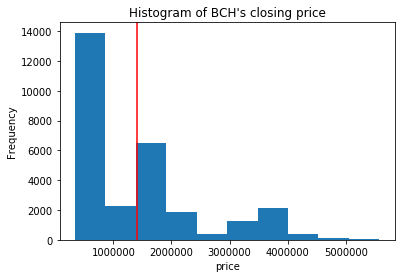

Bin : 336600,       Frequency = 13893
Bin : 860840,       Frequency = 2290
Bin : 1385080,       Frequency = 6481
Bin : 1909320,       Frequency = 1845
Bin : 2433560,       Frequency = 401
Bin : 2957800,       Frequency = 1249
Bin : 3482040,       Frequency = 2149
Bin : 4006280,       Frequency = 407
Bin : 4530520,       Frequency = 131
Bin : 5054760,       Frequency = 21


------LTC   ↓


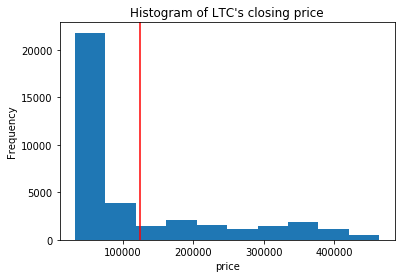

Bin : 32350,       Frequency = 21817
Bin : 75515,       Frequency = 3896
Bin : 118680,       Frequency = 1486
Bin : 161845,       Frequency = 2034
Bin : 205010,       Frequency = 1576
Bin : 248175,       Frequency = 1183
Bin : 291340,       Frequency = 1499
Bin : 334505,       Frequency = 1922
Bin : 377670,       Frequency = 1105
Bin : 420835,       Frequency = 490


------EOS   ↓


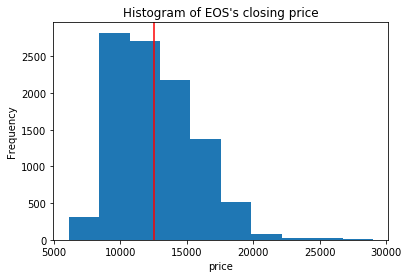

Bin : 6120,       Frequency = 306
Bin : 8408,       Frequency = 2822
Bin : 10696,       Frequency = 2704
Bin : 12983,       Frequency = 2171
Bin : 15271,       Frequency = 1368
Bin : 17559,       Frequency = 511
Bin : 19847,       Frequency = 78
Bin : 22135,       Frequency = 20
Bin : 24422,       Frequency = 22
Bin : 26710,       Frequency = 7


------DASH  ↓


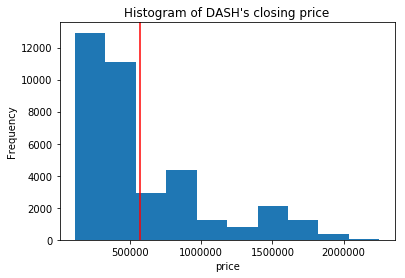

Bin : 113600,       Frequency = 12926
Bin : 327230,       Frequency = 11086
Bin : 540860,       Frequency = 2925
Bin : 754490,       Frequency = 4340
Bin : 968120,       Frequency = 1255
Bin : 1181750,       Frequency = 801
Bin : 1395380,       Frequency = 2079
Bin : 1609010,       Frequency = 1215
Bin : 1822640,       Frequency = 344
Bin : 2036270,       Frequency = 37


------XMR   ↓


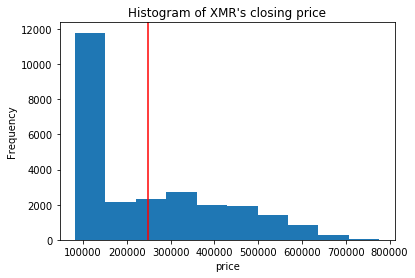

Bin : 81500,       Frequency = 11789
Bin : 150990,       Frequency = 2172
Bin : 220480,       Frequency = 2310
Bin : 289970,       Frequency = 2745
Bin : 359460,       Frequency = 1972
Bin : 428950,       Frequency = 1903
Bin : 498440,       Frequency = 1427
Bin : 567930,       Frequency = 861
Bin : 637420,       Frequency = 249
Bin : 706910,       Frequency = 26


------ETC   ↓


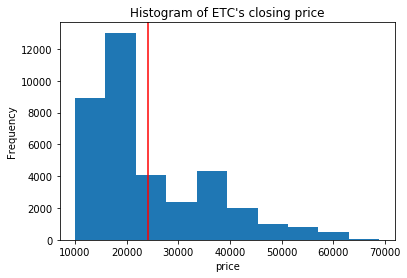

Bin : 10005,       Frequency = 8934
Bin : 15894,       Frequency = 13027
Bin : 21784,       Frequency = 4049
Bin : 27674,       Frequency = 2364
Bin : 33563,       Frequency = 4306
Bin : 39452,       Frequency = 2008
Bin : 45342,       Frequency = 1004
Bin : 51232,       Frequency = 819
Bin : 57121,       Frequency = 467
Bin : 63010,       Frequency = 30


------QTUM  ↓


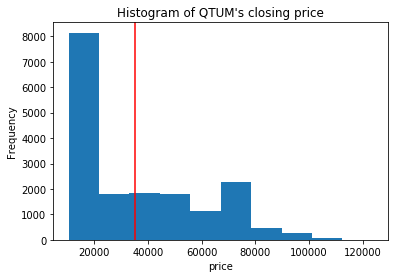

Bin : 10460,       Frequency = 8143
Bin : 21799,       Frequency = 1811
Bin : 33138,       Frequency = 1846
Bin : 44477,       Frequency = 1788
Bin : 55816,       Frequency = 1152
Bin : 67155,       Frequency = 2263
Bin : 78494,       Frequency = 481
Bin : 89833,       Frequency = 256
Bin : 101172,       Frequency = 52
Bin : 112511,       Frequency = 9


------BTG   ↓


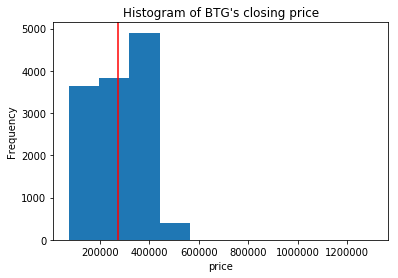

Bin : 72800,       Frequency = 3634
Bin : 196050,       Frequency = 3827
Bin : 319300,       Frequency = 4903
Bin : 442550,       Frequency = 403
Bin : 565800,       Frequency = 6
Bin : 689050,       Frequency = 3
Bin : 812300,       Frequency = 3
Bin : 935550,       Frequency = 1
Bin : 1058800,       Frequency = 1
Bin : 1182050,       Frequency = 4


------ZEC   ↓


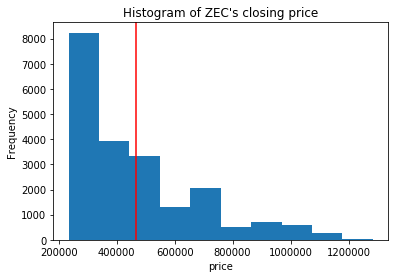

Bin : 234300,       Frequency = 8236
Bin : 339260,       Frequency = 3930
Bin : 444220,       Frequency = 3338
Bin : 549180,       Frequency = 1322
Bin : 654140,       Frequency = 2061
Bin : 759100,       Frequency = 511
Bin : 864060,       Frequency = 697
Bin : 969020,       Frequency = 596
Bin : 1073980,       Frequency = 264
Bin : 1178940,       Frequency = 14




In [20]:
# 코인별 종가의 히스토그램 그리기
for coin in coinList:
    print("------{:6s}↓".format(coin))
    plt.title("Histogram of " + coin+"'s closing price")
    (n, bins, patched) = plt.hist(coins[coin]['closing price'])
#     print(n) # bins구간에 해당하는 빈도수
#     print(bins) # 일정 간격으로 나눈 것
    # for i in range(len(bins)-1):
    #     print(bins[i+1] - bins[i])
    plt.axvline(coins[coin]['closing price'].mean() ,color='red')
    plt.xlabel('price')
    plt.ylabel('Frequency')
    plt.show()
    for index in range(len(n)):
        print("Bin : {:.0f}, {:5s} Frequency = {:.0f}".format(bins[index], " ", n[index]))
    print(end="\n\n")

2017년 12월 13일 수요일 오후 8:50:00 ~ 2018년 2월 21일 수요일 오전 8:50:00
------BTC   ↓


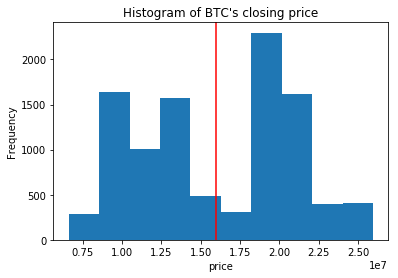

Bin : 6602000,       Frequency = 285
Bin : 8537900,       Frequency = 1634
Bin : 10473800,       Frequency = 1010
Bin : 12409700,       Frequency = 1577
Bin : 14345600,       Frequency = 483
Bin : 16281500,       Frequency = 304
Bin : 18217400,       Frequency = 2296
Bin : 20153300,       Frequency = 1620
Bin : 22089200,       Frequency = 394
Bin : 24025100,       Frequency = 406


------ETH   ↓


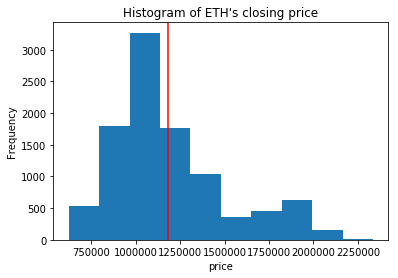

Bin : 623000,       Frequency = 541
Bin : 794200,       Frequency = 1797
Bin : 965400,       Frequency = 3270
Bin : 1136600,       Frequency = 1758
Bin : 1307800,       Frequency = 1040
Bin : 1479000,       Frequency = 357
Bin : 1650200,       Frequency = 458
Bin : 1821400,       Frequency = 623
Bin : 1992600,       Frequency = 147
Bin : 2163800,       Frequency = 18


------XRP   ↓


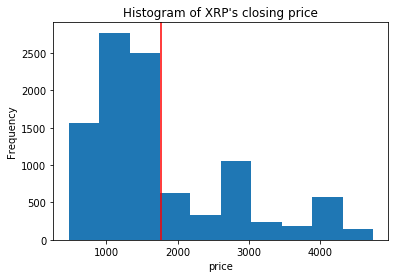

Bin : 474,       Frequency = 1570
Bin : 901,       Frequency = 2774
Bin : 1327,       Frequency = 2506
Bin : 1754,       Frequency = 633
Bin : 2180,       Frequency = 327
Bin : 2607,       Frequency = 1057
Bin : 3034,       Frequency = 241
Bin : 3460,       Frequency = 187
Bin : 3887,       Frequency = 574
Bin : 4313,       Frequency = 140


------BCH   ↓


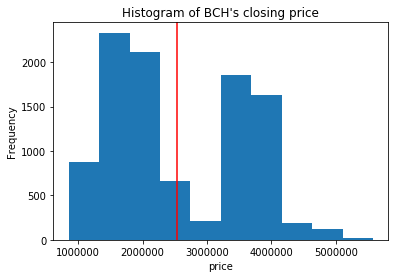

Bin : 853000,       Frequency = 880
Bin : 1325600,       Frequency = 2333
Bin : 1798200,       Frequency = 2119
Bin : 2270800,       Frequency = 660
Bin : 2743400,       Frequency = 214
Bin : 3216000,       Frequency = 1855
Bin : 3688600,       Frequency = 1627
Bin : 4161200,       Frequency = 187
Bin : 4633800,       Frequency = 118
Bin : 5106400,       Frequency = 16


------LTC   ↓


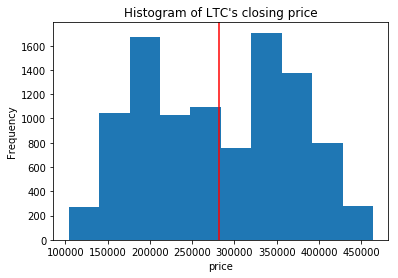

Bin : 103900,       Frequency = 268
Bin : 139910,       Frequency = 1044
Bin : 175920,       Frequency = 1669
Bin : 211930,       Frequency = 1029
Bin : 247940,       Frequency = 1094
Bin : 283950,       Frequency = 755
Bin : 319960,       Frequency = 1707
Bin : 355970,       Frequency = 1371
Bin : 391980,       Frequency = 794
Bin : 427990,       Frequency = 278


------EOS   ↓


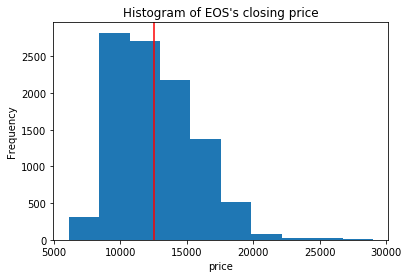

Bin : 6120,       Frequency = 306
Bin : 8408,       Frequency = 2822
Bin : 10696,       Frequency = 2704
Bin : 12983,       Frequency = 2171
Bin : 15271,       Frequency = 1368
Bin : 17559,       Frequency = 511
Bin : 19847,       Frequency = 78
Bin : 22135,       Frequency = 20
Bin : 24422,       Frequency = 22
Bin : 26710,       Frequency = 7


------DASH  ↓


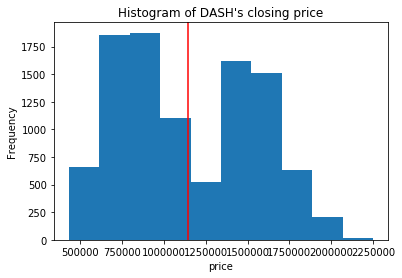

Bin : 433000,       Frequency = 664
Bin : 614690,       Frequency = 1851
Bin : 796380,       Frequency = 1876
Bin : 978070,       Frequency = 1106
Bin : 1159760,       Frequency = 527
Bin : 1341450,       Frequency = 1618
Bin : 1523140,       Frequency = 1514
Bin : 1704830,       Frequency = 634
Bin : 1886520,       Frequency = 206
Bin : 2068210,       Frequency = 13


------XMR   ↓


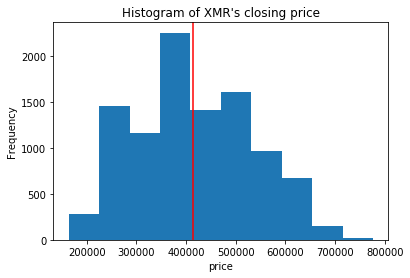

Bin : 163600,       Frequency = 280
Bin : 224880,       Frequency = 1458
Bin : 286160,       Frequency = 1167
Bin : 347440,       Frequency = 2256
Bin : 408720,       Frequency = 1419
Bin : 470000,       Frequency = 1615
Bin : 531280,       Frequency = 971
Bin : 592560,       Frequency = 670
Bin : 653840,       Frequency = 154
Bin : 715120,       Frequency = 19


------ETC   ↓


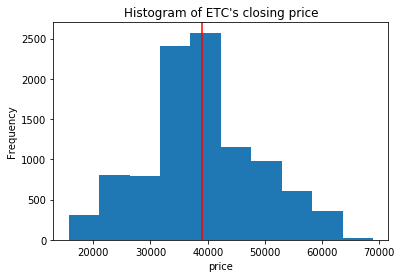

Bin : 15700,       Frequency = 306
Bin : 21020,       Frequency = 809
Bin : 26340,       Frequency = 793
Bin : 31660,       Frequency = 2410
Bin : 36980,       Frequency = 2573
Bin : 42300,       Frequency = 1156
Bin : 47620,       Frequency = 974
Bin : 52940,       Frequency = 610
Bin : 58260,       Frequency = 354
Bin : 63580,       Frequency = 24


------QTUM  ↓


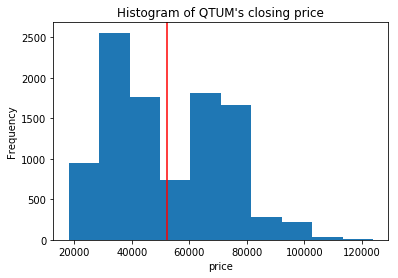

Bin : 18100,       Frequency = 946
Bin : 28675,       Frequency = 2556
Bin : 39250,       Frequency = 1758
Bin : 49825,       Frequency = 732
Bin : 60400,       Frequency = 1810
Bin : 70975,       Frequency = 1662
Bin : 81550,       Frequency = 280
Bin : 92125,       Frequency = 220
Bin : 102700,       Frequency = 38
Bin : 113275,       Frequency = 7


------BTG   ↓


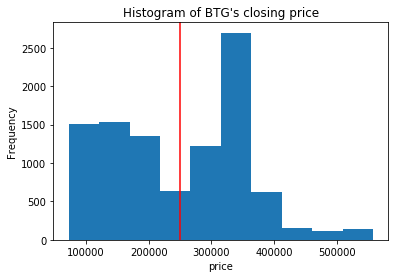

Bin : 72800,       Frequency = 1514
Bin : 121250,       Frequency = 1537
Bin : 169700,       Frequency = 1355
Bin : 218150,       Frequency = 641
Bin : 266600,       Frequency = 1222
Bin : 315050,       Frequency = 2697
Bin : 363500,       Frequency = 629
Bin : 411950,       Frequency = 156
Bin : 460400,       Frequency = 114
Bin : 508850,       Frequency = 144


------ZEC   ↓


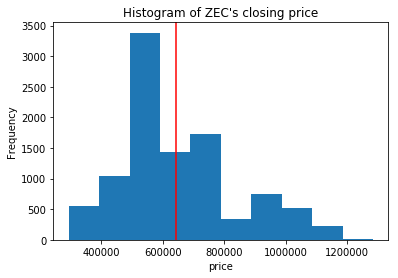

Bin : 294000,       Frequency = 558
Bin : 392990,       Frequency = 1046
Bin : 491980,       Frequency = 3384
Bin : 590970,       Frequency = 1440
Bin : 689960,       Frequency = 1725
Bin : 788950,       Frequency = 346
Bin : 887940,       Frequency = 752
Bin : 986930,       Frequency = 519
Bin : 1085920,       Frequency = 228
Bin : 1184910,       Frequency = 11




In [21]:
# 공통기간: 2017년 12월 13일 수요일 오후 8:50:00 ~ 2018년 2월 21일 수요일 오전 8:50:00
# 코인별 종가의 히스토그램 그리기
print("2017년 12월 13일 수요일 오후 8:50:00 ~ 2018년 2월 21일 수요일 오전 8:50:00")
for coin in coinList:
    print("------{:6s}↓".format(coin))
    plt.title("Histogram of " + coin+"'s closing price")
    (n, bins, patched) = plt.hist(closingPriceDict[coin])
#     print(n) # bins구간에 해당하는 빈도수
#     print(bins) # 일정 간격으로 나눈 것
    # for i in range(len(bins)-1):
    #     print(bins[i+1] - bins[i])
    plt.axvline(closingPriceDict[coin].mean() ,color='red')
    plt.xlabel('price')
    plt.ylabel('Frequency')
    plt.show()
    for index in range(len(n)):
        print("Bin : {:.0f}, {:5s} Frequency = {:.0f}".format(bins[index], " ", n[index]))
    print(end="\n\n")

히스토그램에 의해 나온 가격 구간별 빈도와 평균을 비교한 결과, 모든 코인의 중심 성향은 낮다고 볼 수 있다.

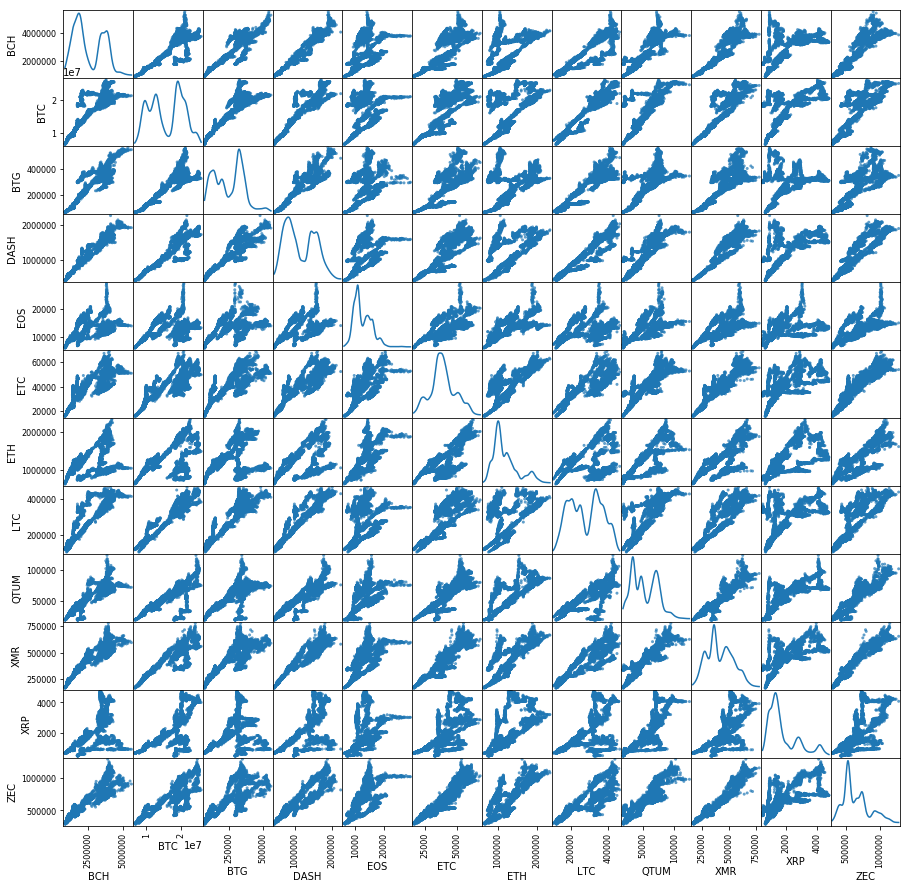

In [22]:
# 12개 코인에 대한 산점도 행렬
# from pandas.tools.plotting import scatter_matrix
# scatter_matrix(coins[coinList[0]][[priceList[0], priceList[1], priceList[2], priceList[3]]], alpha=0.7, figsize=(6, 6), diagonal='kde')
scatter_matrix(closingPriceDict, alpha=0.7, figsize=(15, 15), diagonal='kde')
plt.show() # 0~1..

In [23]:
# 상관계수(Correlation coefficient)
# 두 변수간 선형관계 판단에 활용; 절대값이 0에 가까울수록 선형관계는 없다.
corrCoins = closingPriceDict.corr()
corrCoins

,BCH,BTC,BTG,DASH,EOS,ETC,ETH,LTC,QTUM,XMR,XRP,ZEC
BCH,1.000000,0.869600,0.888080,0.978363,0.424021,0.785826,0.477490,0.883707,0.901557,0.933523,0.641242,0.884724
BTC,0.869600,1.000000,0.913137,0.928358,0.324508,0.784967,0.390082,0.957097,0.790524,0.880124,0.610747,0.809337
BTG,0.888080,0.913137,1.000000,0.910383,0.376878,0.743432,0.278752,0.914425,0.739909,0.841260,0.416226,0.744078
DASH,0.978363,0.928358,0.910383,1.000000,0.400848,0.803932,0.455574,0.930775,0.899156,0.943447,0.665373,0.887397
EOS,0.424021,0.324508,0.376878,0.400848,1.000000,0.608902,0.765748,0.271937,0.564107,0.591614,0.428413,0.562269
ETC,0.785826,0.784967,0.743432,0.803932,0.608902,1.000000,0.715497,0.809291,0.801597,0.900049,0.653307,0.900402
ETH,0.477490,0.390082,0.278752,0.455574,0.765748,0.715497,1.000000,0.319628,0.654514,0.678696,0.711443,0.741866
LTC,0.883707,0.957097,0.914425,0.930775,0.271937,0.809291,0.319628,1.000000,0.768149,0.863139,0.514836,0.810884
QTUM,0.901557,0.790524,0.739909,0.899156,0.564107,0.801597,0.654514,0.768149,1.000000,0.921537,0.787480,0.894817
XMR,0.933523,0.880124,0.841260,0.943447,0.591614,0.900049,0.678696,0.863139,0.921537,1.000000,0.740138,0.952234


- 상관계수의 부호는 두 변수가 함께 증가 또는 함께 감소하는 경향이 있을 경우에 양수로 나타난다. 두 변수 중 한 변수가 증가하거나 감소할 때, 다른 한 변수가 감소하거나 증가하면 상관계수는 음수로 나타난다. 12개의 코인 모두 자기 자신을 제외한 모든 코인과 함께 감소하거나 함께 증가하는 경향을 나타낸다.
- 상관계수의 절대값이 0.1 이하라면 무시해도 될 수준이며, 0.1~0.3의 구간에 속한다면 약한 상관관계, 0.3~0.7 사이의 값이라면 뚜렷한 상관관계를, 0.7보다 클 경우 강한 상관관계를 갖는다고 볼 수 있다.
- 일반적으로 cryptocurrency 중 가장 잘 알려진 대표적인 코인은 비트코인(BitCoin;BTC)이다.
- 상관계수를 살펴본 결과, BTC와 EOS, ETH과의 상관계수가 EOS, ETH를 제외한 다른 코인들과 BTC의 상관계수에 비해 상대적으로 낮은 것으로 나타났지만 0.3이상의 상관계수값을 갖기 때문에 상관관계가 아주 없는 것은 아니며, 약한 상관관계를 갖는다고 할 수 있다.

In [24]:
# 각 코인별 상관계수의 평균값
# corrCoinsKeyList = list(corrCoins.keys())
corrDict = {}
corrMean = []
corrMeanWithKey = {}
for coin in coinList:
    corrDict[coin] = corrCoins[coin].values.tolist()
    corrMean.append(sum(corrDict[coin])/12.0)
    corrMeanWithKey[coin] = sum(corrDict[coin])/12.0
print(corrMean)
print(corrMeanWithKey)
print(max(corrMean))
for i in range(len(corrMean)):
    if corrMean[i] == max(corrMean):
        print(i, 'th is ', list(corrDict.keys())[i], ': ', max(corrMean), ' vs BTC: ', sum(corrDict['BTC'])/12.0)
        
print()
print(pd.concat([corrCoins['BTC'].to_frame(), corrCoins['XMR'].to_frame()], axis=1))

print()
print()
# import operator
rankingCorr = sorted(corrMeanWithKey.items(), key=operator.itemgetter(1), reverse=True)
rankingCorr

[0.7715401130094978, 0.599107551687572, 0.6598963005269772, 0.8056778203564421, 0.7536556859823712, 0.526603835757726, 0.8169671166146107, 0.8538134517993422, 0.7922668039593265, 0.8102788821694978, 0.7305467209868923, 0.8281296808485142]
{'BTC': 0.7715401130094978, 'ETH': 0.599107551687572, 'XRP': 0.6598963005269772, 'BCH': 0.8056778203564421, 'LTC': 0.7536556859823712, 'EOS': 0.526603835757726, 'DASH': 0.8169671166146107, 'XMR': 0.8538134517993422, 'ETC': 0.7922668039593265, 'QTUM': 0.8102788821694978, 'BTG': 0.7305467209868923, 'ZEC': 0.8281296808485142}
0.8538134517993422
7 th is  XMR :  0.8538134517993422  vs BTC:  0.7715401130094978

           BTC       XMR
BCH   0.869600  0.933523
BTC   1.000000  0.880124
BTG   0.913137  0.841260
DASH  0.928358  0.943447
EOS   0.324508  0.591614
ETC   0.784967  0.900049
ETH   0.390082  0.678696
LTC   0.957097  0.863139
QTUM  0.790524  0.921537
XMR   0.880124  1.000000
XRP   0.610747  0.740138
ZEC   0.809337  0.952234




[('XMR', 0.8538134517993422),
 ('ZEC', 0.8281296808485142),
 ('DASH', 0.8169671166146107),
 ('QTUM', 0.8102788821694978),
 ('BCH', 0.8056778203564421),
 ('ETC', 0.7922668039593265),
 ('BTC', 0.7715401130094978),
 ('LTC', 0.7536556859823712),
 ('BTG', 0.7305467209868923),
 ('XRP', 0.6598963005269772),
 ('ETH', 0.599107551687572),
 ('EOS', 0.526603835757726)]

- 더불어, 각 코인별 상관계수의 평균을 구한 결과에 의하면, XMR이 BTC에 비해 다른 코인들과의 상관관계가 평균적으로 보았을 때 더 높다고 할 수 있으며, BTC와 다른 코인들과의 상관정도는 12개 코인 중 중간정도에 해당한다고 볼 수 있다.

---------- BTC ----------


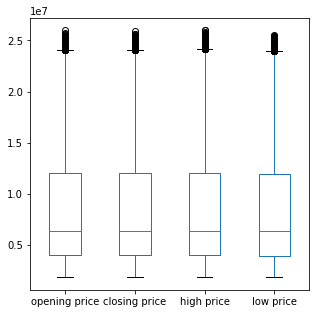

---------- ETH ----------


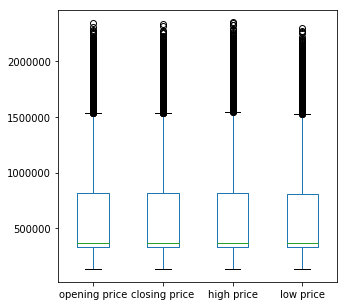

---------- XRP ----------


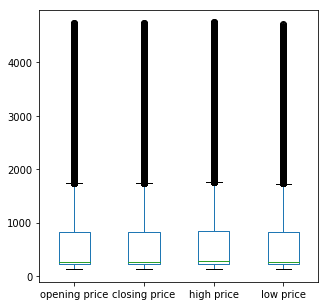

---------- BCH ----------


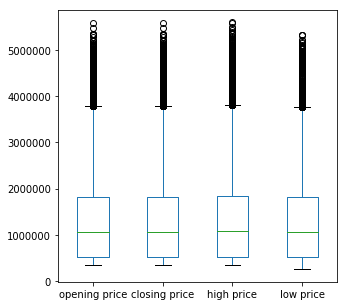

---------- LTC ----------


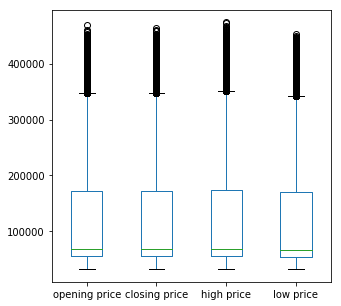

---------- EOS ----------


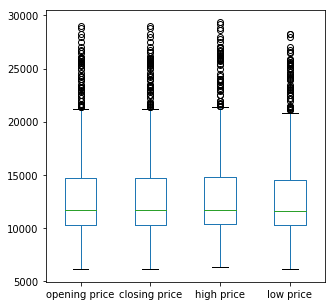

---------- DASH ----------


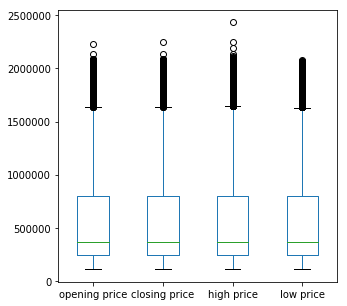

---------- XMR ----------


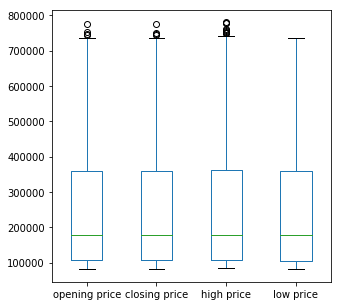

---------- ETC ----------


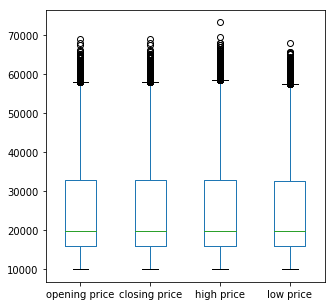

---------- QTUM ----------


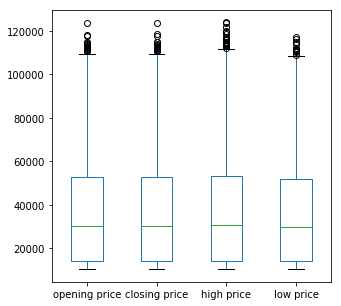

---------- BTG ----------


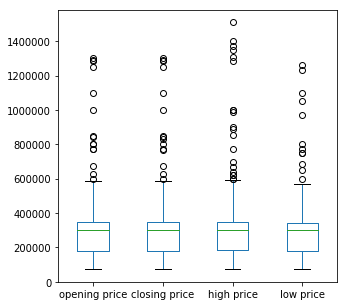

---------- ZEC ----------


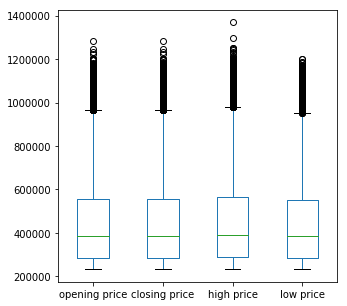

In [25]:
for coin in coinList:
    print("----------", coin, "----------")
    coins[coin][priceList].plot(kind='box', figsize=(5,5))
    plt.show()

---------- BTC ----------


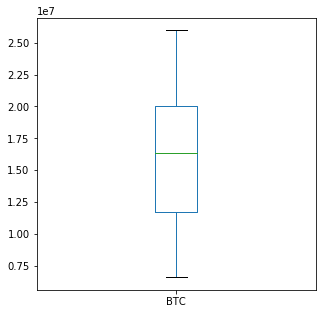

---------- ETH ----------


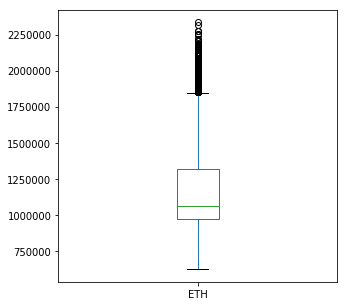

---------- XRP ----------


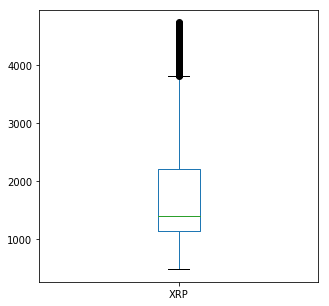

---------- BCH ----------


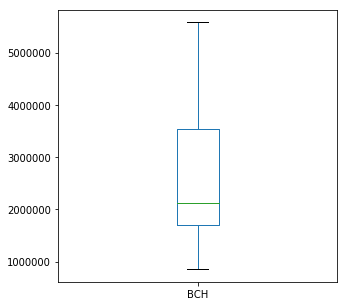

---------- LTC ----------


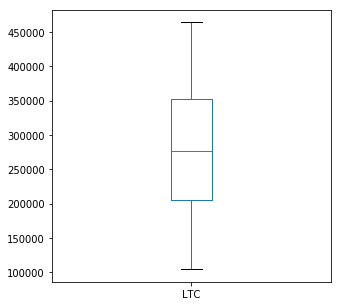

---------- EOS ----------


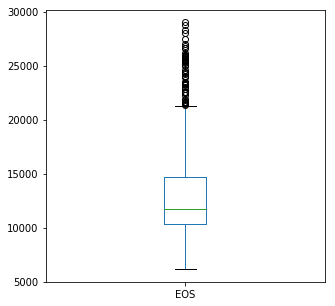

---------- DASH ----------


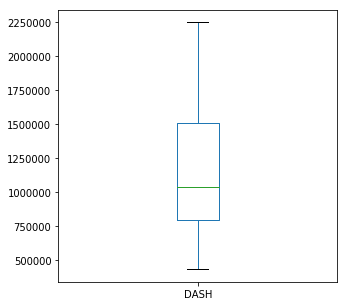

---------- XMR ----------


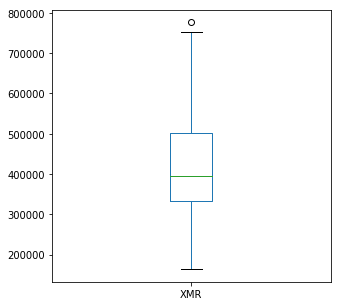

---------- ETC ----------


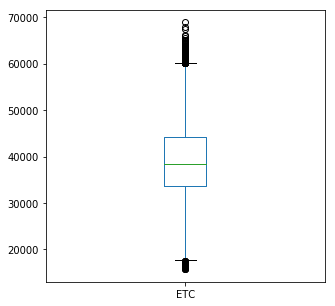

---------- QTUM ----------


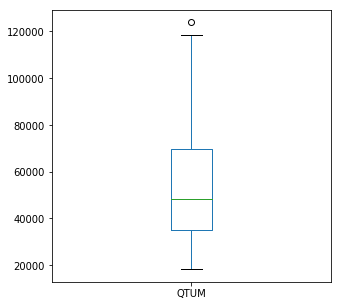

---------- BTG ----------


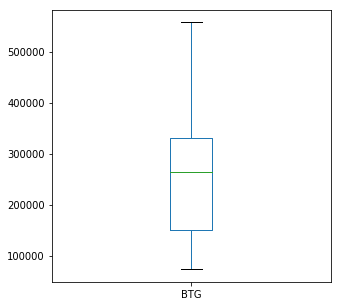

---------- ZEC ----------


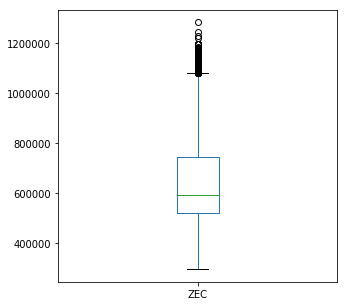

In [26]:
# 공통기간: 2017년 12월 13일 수요일 오후 8:50:00 ~ 2018년 2월 21일 수요일 오전 8:50:00
for coin in coinList:
    print("----------", coin, "----------")
    closingPriceDict[coin].plot(kind='box', figsize=(5,5))
    plt.show()

- 상자그림을 통해 살펴보면 각 코인별 전체 기간의 경우, 대부분의 coin에서 큰 가격 범위에 대해 이상치값들이 극단적으로 많이 발생한 것으로 나타난다.
- 공통기간의 경우, 각 코인 별 전체 기간에 비해서는 이상치값이 발생하지 않거나 덜 발생하는 코인들이 있는 것으로 나타났다.

auto-correlation
BTC  's closing price


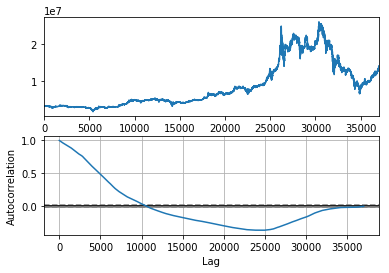

------------------------------
ETH  's closing price


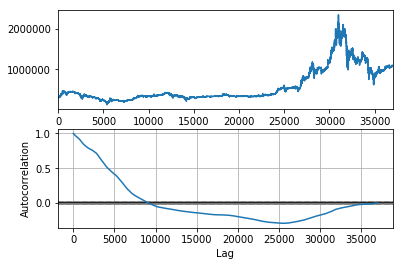

------------------------------
XRP  's closing price


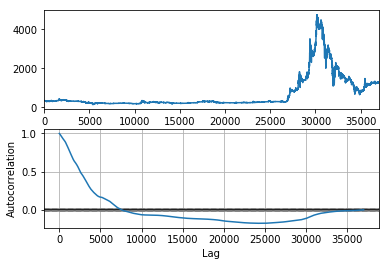

------------------------------
BCH  's closing price


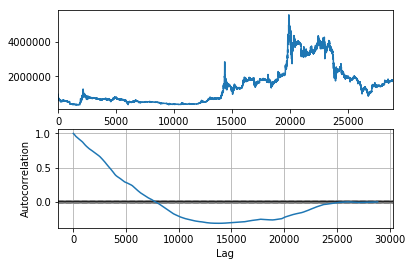

------------------------------
LTC  's closing price


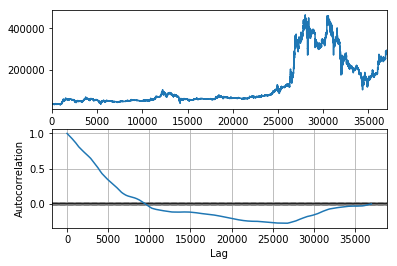

------------------------------
EOS  's closing price


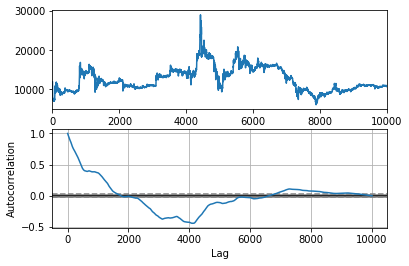

------------------------------
DASH 's closing price


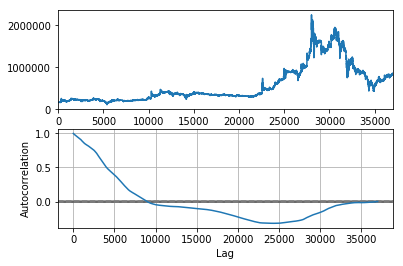

------------------------------
XMR  's closing price


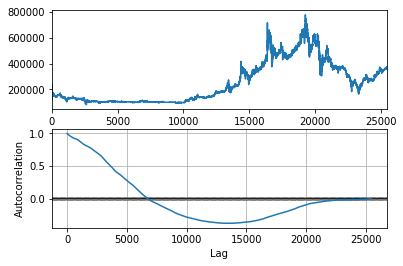

------------------------------
ETC  's closing price


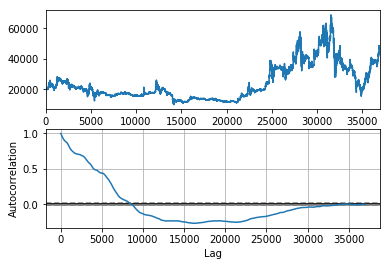

------------------------------
QTUM 's closing price


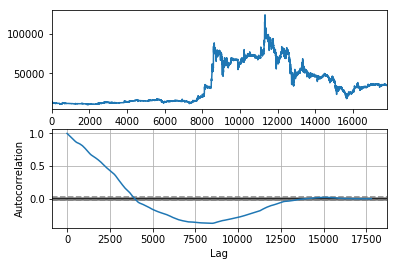

------------------------------
BTG  's closing price


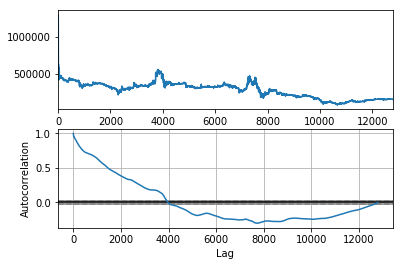

------------------------------
ZEC  's closing price


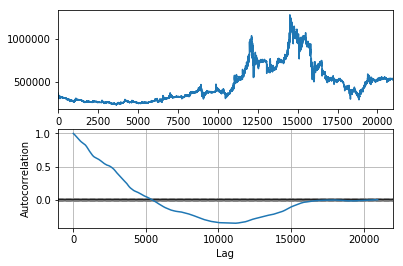

------------------------------


In [27]:
# 각 코인별 전체 기간
print("auto-correlation")
for coin in coinList:
    print("{:5s}'s {:10s}".format(coin, priceList[1]))
#     from pandas.plotting import scatter_matrix, autocorrelation_plot
    fig, axs = plt.subplots(2,1)
    coins[coin][priceList[1]].plot(ax=axs[0])
    autocorrelation_plot(coins[coin][priceList[1]], ax=axs[1])
    plt.show()
    print("------------------------------")

auto-correlation
BTC  's closing price


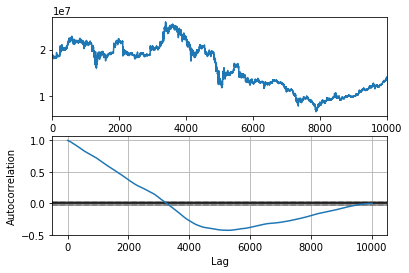

------------------------------
ETH  's closing price


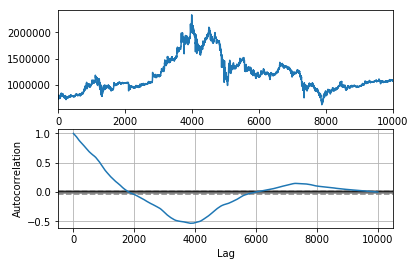

------------------------------
XRP  's closing price


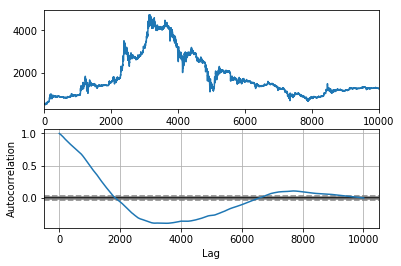

------------------------------
BCH  's closing price


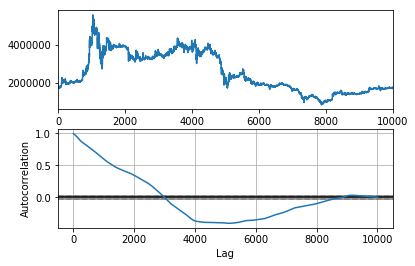

------------------------------
LTC  's closing price


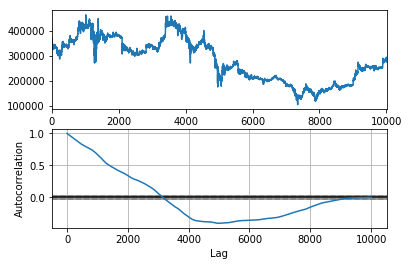

------------------------------
EOS  's closing price


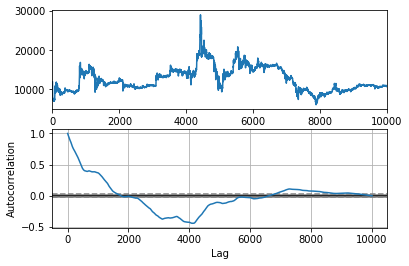

------------------------------
DASH 's closing price


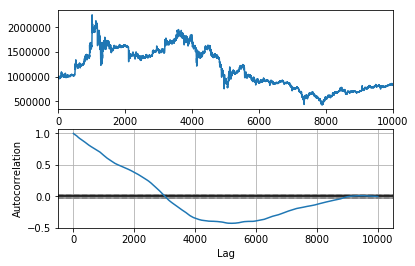

------------------------------
XMR  's closing price


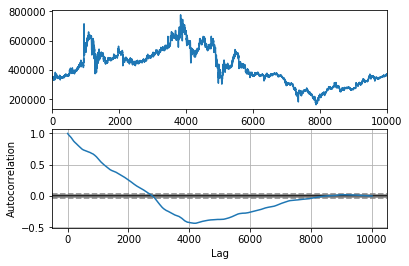

------------------------------
ETC  's closing price


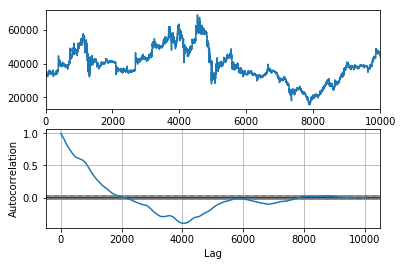

------------------------------
QTUM 's closing price


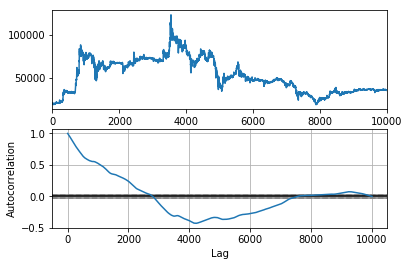

------------------------------
BTG  's closing price


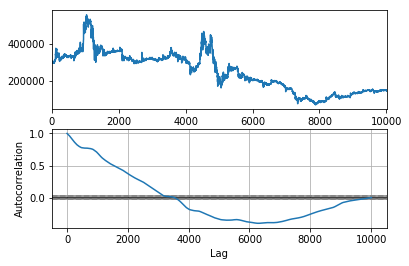

------------------------------
ZEC  's closing price


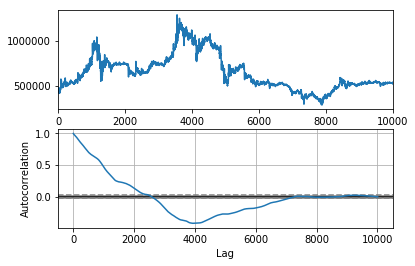

------------------------------


In [28]:
# 공통 기간
print("auto-correlation")
for coin in coinList:
    print("{:5s}'s {:10s}".format(coin, priceList[1]))
#     from pandas.tools.plotting import scatter_matrix, autocorrelation_plot
#     from pandas.plotting import scatter_matrix, autocorrelation_plot
    fig, axs = plt.subplots(2,1)
    closingPriceDict[coin].plot(ax=axs[0])
    autocorrelation_plot(closingPriceDict[coin], ax=axs[1])
    plt.show()
    print("------------------------------")

- 자기상관을 통해 시계열 데이터의 무작위성을 나타낼 수 있는데, 0보다 큰 값이 나올 경우 자기상관이 있다는 것으로 해석할 수 있으며 이는 해당 시계열 데이터가 일정한 패턴을 갖고 있다는 것을 의미한다.
- 각 코인별로 종가 그래프와 자기 상관 그래프를 표현한 결과, 모든 코인이 시간의 흐름에 따라 자기상관이 0에 가까워지므로 무작위성을 갖고 있다.

어떤 데이터에 회귀 모델을 적용한다는 것은 곧 해당 데이터의 분포가 정규분포를 따르며, 앞으로 나올 값들이 평균에 회귀하는 경향으로 발생할 것임을 가정하고 있다. 따라서 미래에 어떤 값이 발생할지 쉽게 예측이 가능하다. 이하는 주가 데이터가 회귀 모델을 적용하기 적합한 데이터인지 그 여부를 살펴보기 위해 ADF테스트와 허스트 지수, 평균회귀의 Half-life 등을 이용한다.

- 가설 검정 (Hyporthesis Test)
  - γ=0γ=0 인지 알아봄
  - 즉, BTC 시계열 데이터는 RandomWalk이라는 가설을 테스트 함.
  
- ADF (귀무) 가설 검정 (ADF Hypothesis Test)
  - 판단 방법
    - γ =0이라는 가설 검정에 실패하면 BTC 시계열 데이터는 Random Walk가 아니고 평균회귀성을 지님을 증명하게 됨
    - γ =0이라는 가설 검정에 성공하면 BTC 시계열 데이터는 Random Walk임을 증명하게 됨
  - 가설 검정(Hypothesis Test)에 실패하려면  γγ  값이 1%, 5%, 10% 기각값 (Critical Value)중 하나보다 작아야 한다.
    - γ  값인 -1.1151988927780352 이 1%, 5%, 10% 기각값보다 크기 때문에 가설 검정 성공
    - 즉, BTC 시계열 데이터는 Random Walk

In [29]:
# from pandas.core import datetools as ts
coinsADFTest = {}
testStatisticsDict = {}
for coin in coinList:
    print("{:5s}'s ADF test result ↓".format(coin))
    coinsADFTest[coin] = ts.adfuller(coins[coin]['closing price'])
    TestStatistics = list(coinsADFTest[coin][4].keys())
    for i, statistic in enumerate(TestStatistics):
        statistic = int(statistic[:len(TestStatistics[i])-1])
        if coinsADFTest[coin][0] < statistic:
            testStatisticsDict[statistic] = True
            coinsADFTest[coin] = coinsADFTest[coin]+(TestStatistics[i], testStatisticsDict[statistic], )
        else:
            testStatisticsDict[statistic] = False
            coinsADFTest[coin] = coinsADFTest[coin]+(TestStatistics[i], testStatisticsDict[statistic], )
    pprint.PrettyPrinter(indent=4).pprint(coinsADFTest[coin])    
    print()
print("end")

BTC  's ADF test result ↓
(   -1.126834344959472,
    0.70425292608457202,
    53,
    36954,
    {   '1%': -3.4305269701330996,
        '10%': -2.5668116321917362,
        '5%': -2.8616182165558315},
    938261.84384347557,
    '1%',
    True,
    '5%',
    True,
    '10%',
    True)

ETH  's ADF test result ↓
(   -1.1444631118670507,
    0.69701893748466537,
    53,
    36953,
    {   '1%': -3.4305269749224925,
        '10%': -2.5668116333184172,
        '5%': -2.8616182186725654},
    756756.60692830477,
    '1%',
    True,
    '5%',
    True,
    '10%',
    True)

XRP  's ADF test result ↓
(   -1.3622258087601151,
    0.60024567379051352,
    53,
    36954,
    {   '1%': -3.4305269701330996,
        '10%': -2.5668116321917362,
        '5%': -2.8616182165558315},
    298203.76261999516,
    '1%',
    True,
    '5%',
    True,
    '10%',
    True)

BCH  's ADF test result ↓
(   -1.4502719318241544,
    0.55795220819190405,
    50,
    28816,
    {   '1%': -3.4305769531725172,
       

In [30]:
# from pandas.core import datetools as ts
coinsADFTest = {}
testStatisticsDict = {}
for coin in coinList:
    print("{:5s}'s ADF test result ↓".format(coin))
    coinsADFTest[coin] = ts.adfuller(closingPriceDict[coin])
    TestStatistics = list(coinsADFTest[coin][4].keys())
    for i, statistic in enumerate(TestStatistics):
        statistic = int(statistic[:len(TestStatistics[i])-1])
        if coinsADFTest[coin][0] < statistic:
            testStatisticsDict[statistic] = True
            coinsADFTest[coin] = coinsADFTest[coin]+(TestStatistics[i], testStatisticsDict[statistic], )
        else:
            testStatisticsDict[statistic] = False
            coinsADFTest[coin] = coinsADFTest[coin]+(TestStatistics[i], testStatisticsDict[statistic], )
    pprint.PrettyPrinter(indent=4).pprint(coinsADFTest[coin])    
    print()
print("end")

BTC  's ADF test result ↓
(   -0.94944706250589028,
    0.77125320616362547,
    20,
    9988,
    {   '1%': -3.4310048840021001,
        '10%': -2.5669240529873334,
        '5%': -2.8618294197346872},
    261965.31237463048,
    '1%',
    True,
    '5%',
    True,
    '10%',
    True)

ETH  's ADF test result ↓
(   -1.7786364762803286,
    0.39111847687493217,
    37,
    9971,
    {   '1%': -3.4310060008305139,
        '10%': -2.5669243156871908,
        '5%': -2.8618299132518468},
    216418.87067677925,
    '1%',
    True,
    '5%',
    True,
    '10%',
    True)

XRP  's ADF test result ↓
(   -1.4925798558966059,
    0.53717873254303239,
    38,
    9970,
    {   '1%': -3.4310060666449416,
        '10%': -2.5669243311680274,
        '5%': -2.8618299423346878},
    93449.142727961153,
    '1%',
    True,
    '5%',
    True,
    '10%',
    True)

BCH  's ADF test result ↓
(   -1.2992681105553339,
    0.62950708743624961,
    37,
    9971,
    {   '1%': -3.4310060008305139,
        '

- ADF 테스트를 위해 '현 시점 t에서의 사건과 이전 시점 t-1에서의 사건이 독립적이다'라는 가설을 세운 후, 이에 대한 가설기각 여부를 살펴 가설을 기각할 수 있다면 해당 데이터는 회귀 모델을 적용하기 적합한 시계열 데이터라는 결론을 내릴 수 있다.
- 12개 코인 각각에 대한 ADF 테스트를 수행한 결과 모든 코인에서 가설을 기각할 수 없다. 따라서 해당 시계열 데이터에는 회귀 모델을 적용할 수 없다는 결론을 내릴 수 있다.

In [31]:
coinsHurstExp = {}
for coin in coinList:
    lags = range(2, 100)
    ts = np.log(coins[coin]['closing price'].to_frame())
    tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    result = poly[0] * 2.0
    print("{:5s}'s Hurst Exponent: {:f}".format(coin, result[0]), end="/")
    if result[0] < 0.5:
        print("평균에 회귀")
    elif result[0] > 0.5:
        print("발산")
    elif result[0] == 0.5:
        print("랜덤워크; GBM(기하적 브라운 운동)")
    print()

BTC  's Hurst Exponent: 0.456083/평균에 회귀

ETH  's Hurst Exponent: 0.446113/평균에 회귀

XRP  's Hurst Exponent: 0.465278/평균에 회귀

BCH  's Hurst Exponent: 0.451396/평균에 회귀

LTC  's Hurst Exponent: 0.442114/평균에 회귀

EOS  's Hurst Exponent: 0.444115/평균에 회귀

DASH 's Hurst Exponent: 0.396069/평균에 회귀

XMR  's Hurst Exponent: 0.392814/평균에 회귀

ETC  's Hurst Exponent: 0.443768/평균에 회귀

QTUM 's Hurst Exponent: 0.479754/평균에 회귀

BTG  's Hurst Exponent: 0.405242/평균에 회귀

ZEC  's Hurst Exponent: 0.393766/평균에 회귀



In [32]:
coinsHurstExp = {}
for coin in coinList:
    lags = range(2, 100)
    ts = np.log(closingPriceDict[coin].to_frame())
    tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    result = poly[0] * 2.0
    coinsHurstExp[coin] = result[0]
    print("{:5s}'s Hurst Exponent: {:f}".format(coin, result[0]), end=" / ")
    if result[0] < 0.5:
        print("평균에 회귀")
    elif result[0] > 0.5:
        print("발산")
    elif result[0] == 0.5:
        print("랜덤워크; GBM(기하적 브라운 운동)")
    print()

BTC  's Hurst Exponent: 0.457698 / 평균에 회귀

ETH  's Hurst Exponent: 0.441234 / 평균에 회귀

XRP  's Hurst Exponent: 0.470470 / 평균에 회귀

BCH  's Hurst Exponent: 0.465962 / 평균에 회귀

LTC  's Hurst Exponent: 0.424898 / 평균에 회귀

EOS  's Hurst Exponent: 0.444115 / 평균에 회귀

DASH 's Hurst Exponent: 0.428556 / 평균에 회귀

XMR  's Hurst Exponent: 0.405608 / 평균에 회귀

ETC  's Hurst Exponent: 0.443624 / 평균에 회귀

QTUM 's Hurst Exponent: 0.490686 / 평균에 회귀

BTG  's Hurst Exponent: 0.459099 / 평균에 회귀

ZEC  's Hurst Exponent: 0.401158 / 평균에 회귀



- 시간에 따른 시계열 데이터의 변화의 정도(또는 확산의 정도)가 얼마나 빠른지를 허스트 지수를 통해 나타낸다. 허스트 지수가 0.5보다 작으면 평균에 회귀한다고 할 수 있으며, 0.5보다 크면 확산이 빠르게 일어나 발산한다고 볼 수 있다. 또한 값의 크기가 그 정도를 나타낸다. 그 값이 0이라면 회귀라고 결론내릴 수 있고, 1이라면 발산한다고 본다.
- 12개 코인별 허스트 지수를 조사한 결과 모두 0.5보다 작은 값을 갖지만 뚜렷한 회귀 성향을 보인다고 볼 수는 없다. 

In [33]:
coinsHalfLife = {}
for coin in coinList:
    price = pd.Series(coins[coin]['closing price'])
    lagged_price = price.shift(1).fillna(method='bfill')
    delta = price - lagged_price
    beta = np.polyfit(lagged_price, delta, 1)[0]
    half_life = (-1 * np.log(2) / beta)
    half_life
    coinsHalfLife[coin] = half_life
    print("{:5s}'s Half-life: {:10.4f}. {:5d}분({:4d}시간, {:3d}일)의 평균회귀 시간을 갖는다.".format(coin, half_life, int(half_life), int(half_life/60), int(half_life/60/24)))

BTC  's Half-life:  7857.5672.  7857분( 130시간,   5일)의 평균회귀 시간을 갖는다.
ETH  's Half-life:  5470.3199.  5470분(  91시간,   3일)의 평균회귀 시간을 갖는다.
XRP  's Half-life:  5388.8637.  5388분(  89시간,   3일)의 평균회귀 시간을 갖는다.
BCH  's Half-life:  2990.2104.  2990분(  49시간,   2일)의 평균회귀 시간을 갖는다.
LTC  's Half-life:  5039.9336.  5039분(  83시간,   3일)의 평균회귀 시간을 갖는다.
EOS  's Half-life:   349.3821.   349분(   5시간,   0일)의 평균회귀 시간을 갖는다.
DASH 's Half-life:  3759.4517.  3759분(  62시간,   2일)의 평균회귀 시간을 갖는다.
XMR  's Half-life:  2215.1896.  2215분(  36시간,   1일)의 평균회귀 시간을 갖는다.
ETC  's Half-life:  2369.9985.  2369분(  39시간,   1일)의 평균회귀 시간을 갖는다.
QTUM 's Half-life:  2218.8554.  2218분(  36시간,   1일)의 평균회귀 시간을 갖는다.
BTG  's Half-life:   255.1854.   255분(   4시간,   0일)의 평균회귀 시간을 갖는다.
ZEC  's Half-life:  1437.1053.  1437분(  23시간,   0일)의 평균회귀 시간을 갖는다.


In [34]:
rankingHalfLife = sorted(coinsHalfLife.items(), key=operator.itemgetter(1))
rankingHalfLife

[('BTG', 255.18543142454109),
 ('EOS', 349.38213856870567),
 ('ZEC', 1437.1053303421522),
 ('XMR', 2215.1896150108801),
 ('QTUM', 2218.8553921903404),
 ('ETC', 2369.9984520647199),
 ('BCH', 2990.210414136352),
 ('DASH', 3759.4517229881144),
 ('LTC', 5039.9335823536812),
 ('XRP', 5388.8637436931131),
 ('ETH', 5470.3199422452653),
 ('BTC', 7857.5672084872385)]

In [35]:
coinsHalfLife = {}
for coin in coinList:
    price = pd.Series(closingPriceDict[coin])
    lagged_price = price.shift(1).fillna(method='bfill')
    delta = price - lagged_price
    beta = np.polyfit(lagged_price, delta, 1)[0]
    half_life = (-1 * np.log(2) / beta)
    half_life
    coinsHalfLife[coin] = half_life
    print("{:5s}'s Half-life: {:10.4f}. {:5d}분({:4d}시간, {:3d}일)의 평균회귀 시간을 갖는다.".format(coin, half_life, int(half_life), int(half_life/60), int(half_life/60/24)))

BTC  's Half-life:  2159.3139.  2159분(  35시간,   1일)의 평균회귀 시간을 갖는다.
ETH  's Half-life:   788.7681.   788분(  13시간,   0일)의 평균회귀 시간을 갖는다.
XRP  's Half-life:  1612.4427.  1612분(  26시간,   1일)의 평균회귀 시간을 갖는다.
BCH  's Half-life:  1293.1215.  1293분(  21시간,   0일)의 평균회귀 시간을 갖는다.
LTC  's Half-life:   891.2980.   891분(  14시간,   0일)의 평균회귀 시간을 갖는다.
EOS  's Half-life:   349.3821.   349분(   5시간,   0일)의 평균회귀 시간을 갖는다.
DASH 's Half-life:  1140.8050.  1140분(  19시간,   0일)의 평균회귀 시간을 갖는다.
XMR  's Half-life:   557.9595.   557분(   9시간,   0일)의 평균회귀 시간을 갖는다.
ETC  's Half-life:   533.9147.   533분(   8시간,   0일)의 평균회귀 시간을 갖는다.
QTUM 's Half-life:   805.2811.   805분(  13시간,   0일)의 평균회귀 시간을 갖는다.
BTG  's Half-life:  1161.3342.  1161분(  19시간,   0일)의 평균회귀 시간을 갖는다.
ZEC  's Half-life:   560.1541.   560분(   9시간,   0일)의 평균회귀 시간을 갖는다.


- 평균으로 회귀하는 시간을 구하여 회귀 모델에 적용가능한 데이터인지를 판단하고, 해당 데이터의 회귀 주기를 찾는 방법을 Half-life라고 한다. 
- 각 코인별 Half-life를 구한 결과, 모든 코인에서 값이 지나치게 크게 나왔기 때문에 회귀하려는 성질이 희박하다고 할 수 있다.

In [36]:
rankingHalfLife = sorted(coinsHalfLife.items(), key=operator.itemgetter(1))
rankingHalfLife

[('EOS', 349.38213856870567),
 ('ETC', 533.91473369009782),
 ('XMR', 557.9594849055527),
 ('ZEC', 560.15412630118203),
 ('ETH', 788.76810832689137),
 ('QTUM', 805.28114634953079),
 ('LTC', 891.29797246233784),
 ('DASH', 1140.8050366671116),
 ('BTG', 1161.3342039166735),
 ('BCH', 1293.1215080484865),
 ('XRP', 1612.4426518039975),
 ('BTC', 2159.3138544496546)]

- 일반적으로 BTC의 Half-life가 가장 높으며, EOS의 Half-life가 적은 경향을 보이기 때문에, 상대적으로 BTC보다는 EOS의 회귀 성향이 좀 더 높다고 볼 수 있다.

- ADF테스트, 허스트 지수, Half-life를 통해 12개의 코인 중 어느 코인도 회귀 모델을 적용하기에는 적합하지 않다는 결론을 얻을 수 있다.
- 이와 같이 특정 모델이 적합하지 않을 경우, 머신러닝을 이용하면 특별한 수학적 모델 없이 데이터로부터 모델링이 가능하다.

In [37]:
def makeDataset(coin, time_lags = 6, closing_price = True, volume = False, opening_price = False, high_price = False, low_price = False):
    coinsLag = pd.DataFrame(index=coin.index)
    
    if closing_price == True:
        coinsLag['closing price'] = coin['closing price']
        coinsLag['closeLag%s'%str(time_lags)] = coin['closing price'].shift(time_lags)
        coinsLag['closeLag%s_Change'%str(time_lags)] = coinsLag["closeLag%s"%str(time_lags)].pct_change()*100.0
        coinsLag["closeDirection"] = np.sign(coinsLag["closeLag%s_Change"%str(time_lags)])
    
    if volume == True:
        coinsLag['volume'] = coin['volume']
        coinsLag['volumeLag%s'%str(time_lags)] = coin['volume'].shift(time_lags)
        coinsLag['volumeLag%s_Change'%str(time_lags)] = coinsLag["volumeLag%s"%str(time_lags)].pct_change()*100.0
        coinsLag["volumeDirection"] = np.sign(coinsLag["volumeLag%s_Change"%str(time_lags)])
        
    if opening_price == True:
        coinsLag['opening price'] = coin['opening price']
        coinsLag['openLag%s'%str(time_lags)] = coin['opening price'].shift(time_lags)
        coinsLag['openLag%s_Change'%str(time_lags)] = coinsLag["openLag%s"%str(time_lags)].pct_change()*100.0
        coinsLag["openDirection"] = np.sign(coinsLag["openLag%s_Change"%str(time_lags)])
        
    if high_price == True:
        coinsLag['high price'] = coin['high price']
        coinsLag['highLag%s'%str(time_lags)] = coin['high price'].shift(time_lags)
        coinsLag['highLag%s_Change'%str(time_lags)] = coinsLag["highLag%s"%str(time_lags)].pct_change()*100.0
        coinsLag["highDirection"] = np.sign(coinsLag["highLag%s_Change"%str(time_lags)])
        
    if low_price == True:
        coinsLag['low price'] = coin['low price']
        coinsLag['lowLag%s'%str(time_lags)] = coin['low price'].shift(time_lags)
        coinsLag['lowLag%s_Change'%str(time_lags)] = coinsLag["lowLag%s"%str(time_lags)].pct_change()*100.0
        coinsLag["lowDirection"] = np.sign(coinsLag["lowLag%s_Change"%str(time_lags)])
    
    return coinsLag.dropna(how='any')

In [38]:
coinDataFrameDict = {}
for coin in coinList:
    coinDataFrameDict[coin] = makeDataset(coins[coin], time_lags = 1, closing_price = True, volume=True) 
    # 10분*50개 = 500분 이전의 데이터를 이용할 것이라는 의도
    # time_lags = 1이라면 직전의 데이터를 이용하겠다는 의미
coinDataFrameDict['BTC']
# 직전 값과의 비교.. 아래의 결과가 직전 데이터와의 비교인지, 50개의 데이터와의 비교인지 확인 필요

,closing price,closeLag1,closeLag1_Change,closeDirection,volume,volumeLag1,volumeLag1_Change,volumeDirection
2,3278000,3273000.0,-0.061069,-1.0,60.408720,111.265594,53.424733,1.0
3,3278000,3278000.0,0.152765,1.0,71.351836,60.408720,-45.707638,-1.0
4,3277000,3278000.0,0.000000,0.0,61.227643,71.351836,18.115128,1.0
5,3276000,3277000.0,-0.030506,-1.0,67.067925,61.227643,-14.189113,-1.0
6,3276000,3276000.0,-0.030516,-1.0,70.929332,67.067925,9.538635,1.0
7,3275000,3276000.0,0.000000,0.0,147.377368,70.929332,5.757458,1.0
8,3277000,3275000.0,-0.030525,-1.0,116.589674,147.377368,107.780566,1.0
9,3275000,3277000.0,0.061069,1.0,151.887732,116.589674,-20.890381,-1.0
10,3280000,3275000.0,-0.061031,-1.0,95.183398,151.887732,30.275458,1.0
11,3278000,3280000.0,0.152672,1.0,78.912682,95.183398,-37.333057,-1.0


In [ ]:
선 본문 작성, 데이터 수집
후 챕터 진행

코인별 상관 관계 분석?

코드수정..


In [62]:
normalizedCoinClosingPrice = {}
for coin in coinList:
    normalizedClosingPrice = []
    coinMax = max(closingPriceDict[coin])
    coinMin = min(closingPriceDict[coin])
    for i in range(len(closingPriceDict[coin])):
        normalizedClosingPrice.append(
            (closingPriceDict[coin][i]-coinMin)\
            /(coinMax-coinMin))
        normalizedCoinClosingPrice[coin] = normalizedClosingPrice
normalizedClosingPriceDataFrame = pd.DataFrame(normalizedCoinClosingPrice)

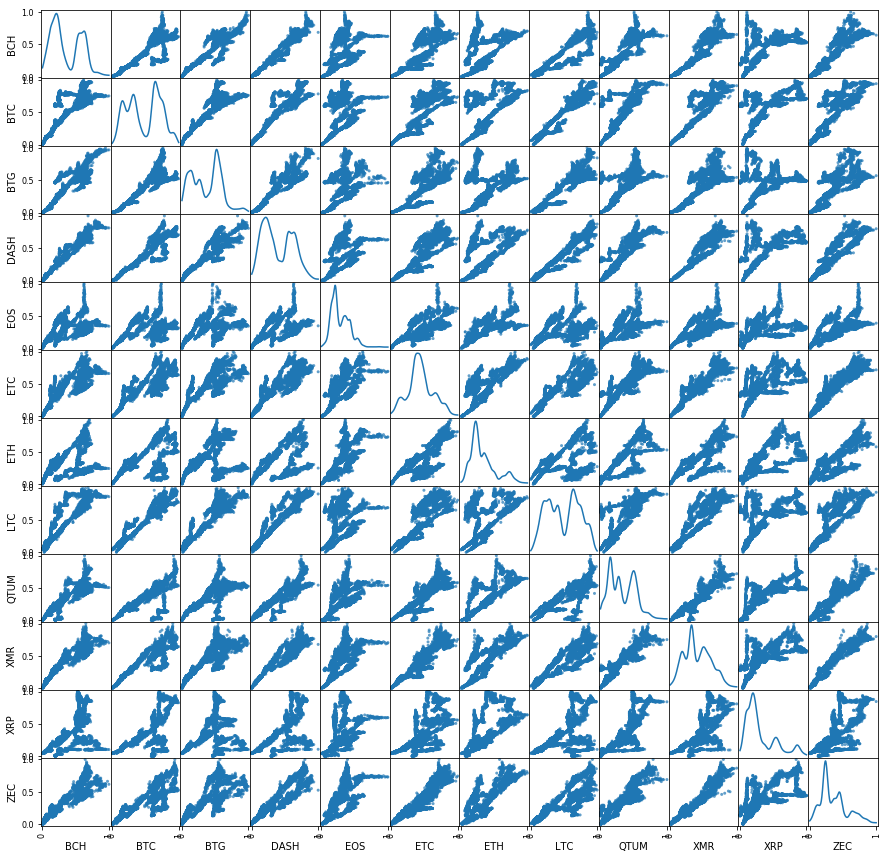

In [63]:
# 12개 코인에 대한 산점도 행렬
# from pandas.tools.plotting import scatter_matrix
# scatter_matrix(coins[coinList[0]][[priceList[0], priceList[1], priceList[2], priceList[3]]], alpha=0.7, figsize=(6, 6), diagonal='kde')
scatter_matrix(normalizedClosingPriceDataFrame, alpha=0.7, figsize=(15, 15), diagonal='kde')
plt.show()

In [64]:
# 상관계수(Correlation coefficient)
# 두 변수간 선형관계 판단에 활용; 절대값이 0에 가까울수록 선형관계는 없다.
corrCoins = normalizedClosingPriceDataFrame.corr()
corrCoins

,BCH,BTC,BTG,DASH,EOS,ETC,ETH,LTC,QTUM,XMR,XRP,ZEC
BCH,1.000000,0.869600,0.888080,0.978363,0.424021,0.785826,0.477490,0.883707,0.901557,0.933523,0.641242,0.884724
BTC,0.869600,1.000000,0.913137,0.928358,0.324508,0.784967,0.390082,0.957097,0.790524,0.880124,0.610747,0.809337
BTG,0.888080,0.913137,1.000000,0.910383,0.376878,0.743432,0.278752,0.914425,0.739909,0.841260,0.416226,0.744078
DASH,0.978363,0.928358,0.910383,1.000000,0.400848,0.803932,0.455574,0.930775,0.899156,0.943447,0.665373,0.887397
EOS,0.424021,0.324508,0.376878,0.400848,1.000000,0.608902,0.765748,0.271937,0.564107,0.591614,0.428413,0.562269
ETC,0.785826,0.784967,0.743432,0.803932,0.608902,1.000000,0.715497,0.809291,0.801597,0.900049,0.653307,0.900402
ETH,0.477490,0.390082,0.278752,0.455574,0.765748,0.715497,1.000000,0.319628,0.654514,0.678696,0.711443,0.741866
LTC,0.883707,0.957097,0.914425,0.930775,0.271937,0.809291,0.319628,1.000000,0.768149,0.863139,0.514836,0.810884
QTUM,0.901557,0.790524,0.739909,0.899156,0.564107,0.801597,0.654514,0.768149,1.000000,0.921537,0.787480,0.894817
XMR,0.933523,0.880124,0.841260,0.943447,0.591614,0.900049,0.678696,0.863139,0.921537,1.000000,0.740138,0.952234


In [65]:
# 상관계수(Correlation coefficient)
# 두 변수간 선형관계 판단에 활용; 절대값이 0에 가까울수록 선형관계는 없다.
corrCoins = closingPriceDict.corr()
corrCoins

,BCH,BTC,BTG,DASH,EOS,ETC,ETH,LTC,QTUM,XMR,XRP,ZEC
BCH,1.000000,0.869600,0.888080,0.978363,0.424021,0.785826,0.477490,0.883707,0.901557,0.933523,0.641242,0.884724
BTC,0.869600,1.000000,0.913137,0.928358,0.324508,0.784967,0.390082,0.957097,0.790524,0.880124,0.610747,0.809337
BTG,0.888080,0.913137,1.000000,0.910383,0.376878,0.743432,0.278752,0.914425,0.739909,0.841260,0.416226,0.744078
DASH,0.978363,0.928358,0.910383,1.000000,0.400848,0.803932,0.455574,0.930775,0.899156,0.943447,0.665373,0.887397
EOS,0.424021,0.324508,0.376878,0.400848,1.000000,0.608902,0.765748,0.271937,0.564107,0.591614,0.428413,0.562269
ETC,0.785826,0.784967,0.743432,0.803932,0.608902,1.000000,0.715497,0.809291,0.801597,0.900049,0.653307,0.900402
ETH,0.477490,0.390082,0.278752,0.455574,0.765748,0.715497,1.000000,0.319628,0.654514,0.678696,0.711443,0.741866
LTC,0.883707,0.957097,0.914425,0.930775,0.271937,0.809291,0.319628,1.000000,0.768149,0.863139,0.514836,0.810884
QTUM,0.901557,0.790524,0.739909,0.899156,0.564107,0.801597,0.654514,0.768149,1.000000,0.921537,0.787480,0.894817
XMR,0.933523,0.880124,0.841260,0.943447,0.591614,0.900049,0.678696,0.863139,0.921537,1.000000,0.740138,0.952234


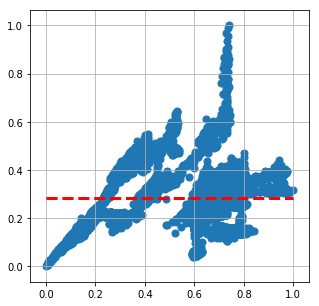

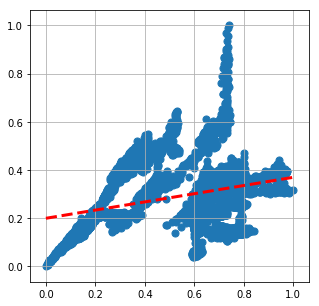

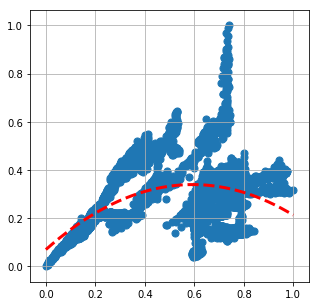

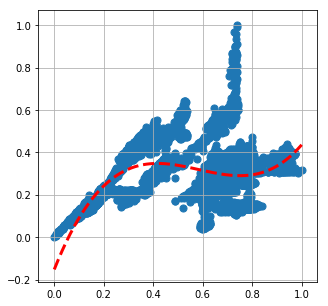

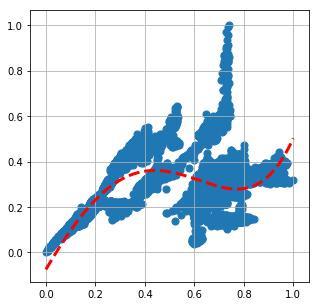

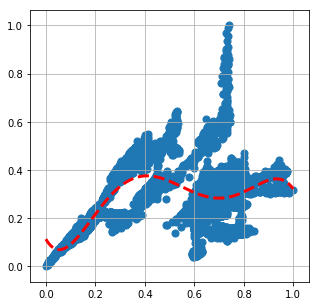

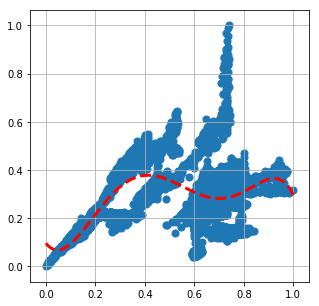

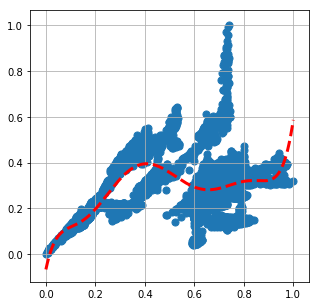

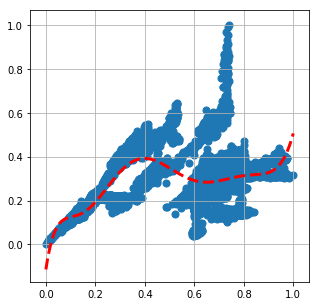

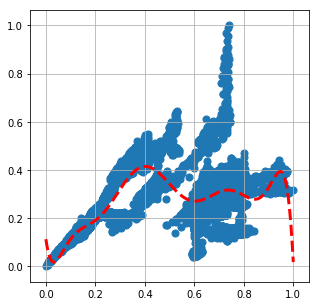

In [77]:
import numpy as np
for i in range(10):
    fp1 = np.polyfit(normalizedClosingPriceDataFrame['BTC'], normalizedClosingPriceDataFrame['EOS'], i)
    f1 = np.poly1d(fp1)
    fx = np.linspace(0, 1, 1000)
    plt.figure(figsize=(5,5))
    plt.scatter(normalizedClosingPriceDataFrame['BTC'], normalizedClosingPriceDataFrame['EOS'], s=50)
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r')
    plt.grid()
    plt.show()